#### Feature Details :
###### SNo - Serial number.
###### Date - Date of funding in format DD/MM/YYYY.
###### StartupName - Name of the startup which got funded.
###### IndustryVertical - Industry to which the startup belongs.
###### SubVertical - Sub-category of the industry type.
###### CityLocation - City which the startup is based out of.
###### InvestorsName - Name of the investors involved in the funding round.
###### InvestmentType - Either Private Equity or Seed Funding.
###### AmountInUSD - Funding Amount in USD.
###### Remarks - Other information, if any.

#### Insights -
###### Find out what type of startups are getting funded in the last few years?
###### Who are the important investors?
###### What are the hot fields that get a lot of funding these days?

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

Problem Statement :
Check the trend of investments over the years. To check
the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings.
Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years
in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to
handle that.

In [37]:
df = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


{2020: 7, 2019: 111, 2018: 309, 2017: 693, 2016: 993, 2015: 930, 15: 1}


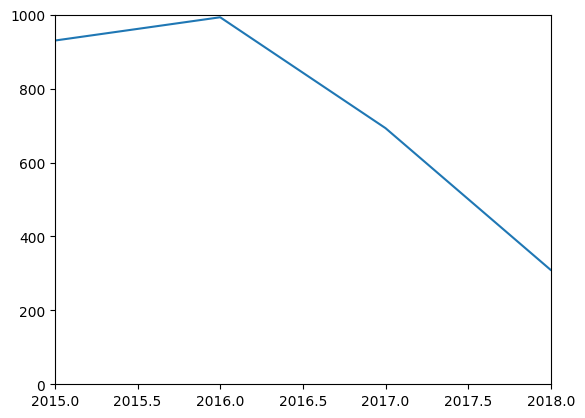

In [54]:
year = df['Date dd/mm/yyyy'].str.split('/').str[2]
year = year.replace("",2017)
year = year.astype(float).fillna('2017')
year = year.astype('int64')

dict = {}
for i in range(0,len(year)):
    if year[i] in dict:
        dict[year[i]] += 1
    else:
        dict[year[i]] = 1
print(dict)

yr = dict.keys()
gain = dict.values()

plt.plot(yr,gain)
plt.axis([2015,2018,0,1000])
plt.show()

Problem Statement :
Find out which cities are generally chosen for starting a
startup.

Find top 10 Indian cities which have most number of
startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city
also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means -
at some place, instead of "Bangalore", "bangalore" is
given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian
and one Foreign. Count those startups in Indian startup
also. Indian city name is first.

Print the city in descending order with respect to the
number of startups.

In [2]:
df1 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df1.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


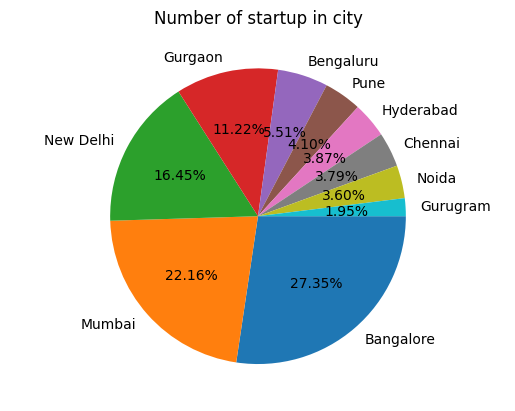

In [10]:
df1['City  Location'].replace('Delhi','New Delhi')
df1.head(1)
city = df1['City  Location'].value_counts()
city.head(10)
Location = []
Count = []
for i in range(0,10):
    Location.append(city.index[i])
    Count.append(city.values[i])
Location = np.array(Location)
Count = np.array(Count)
# plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.pie(Count,labels=Location,autopct="%.2f%%",counterclock=False)
plt.show()

Problem Statement :
Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings
received. Find out percentage of funding each city has got
(among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after
rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means -
at some place, instead of "Bangalore", "bangalore" is
given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian
and one Foreign. Count those startups in Indian startup
also. Indian city name is first.

Print the city in descending order with respect to the
percentage of funding.

In [76]:
df2 = pd.read_csv('startup_funding_.csv',encoding='utf-8')
# df2.sort_values(by='Amount in USD',ascending=False)
df2.head(1)


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN


In [82]:
# Use replace with regex = True Determines if the passed-in pattern is a regular expression:
# If True, assumes the passed-in pattern is a regular expression.
# If False, treats the pattern as a literal string
# Cannot be set to False if pat is a compiled regex or repl is a callable.

df2['AmountInUSD'] = df2['AmountInUSD'].replace(",","",regex=True)
df2['AmountInUSD'] = df2['AmountInUSD'].replace(np.nan,0)
df2['AmountInUSD'] = df2['AmountInUSD'].astype(float).astype(int)
print(df2['AmountInUSD'])


df2['CityLocation'].replace('bengaluru',"Bengaluru", inplace=True)
df2['CityLocation'].replace('Delhi',"New Delhi",inplace=True)

ans = df2.groupby('CityLocation')['AmountInUSD'].sum()


0       1300000
1             0
2             0
3        500000
4        850000
         ...   
2367    4500000
2368     825000
2369    1500000
2370          0
2371     140000
Name: AmountInUSD, Length: 2372, dtype: int32


In [86]:
ans = ans.sort_values(ascending=False)[0:10]
city = ans.index
amount = ans.values

# print(ans.values[0])

CityLocation
Bangalore    8383774108
New Delhi    2751247500
Mumbai       2343694500
Gurgaon      2067821500
Chennai       411105000
Pune          282153000
Hyderabad     194762000
Noida         170338000
Ahmedabad      98186000
Pune / US      68500000
Name: AmountInUSD, dtype: int64


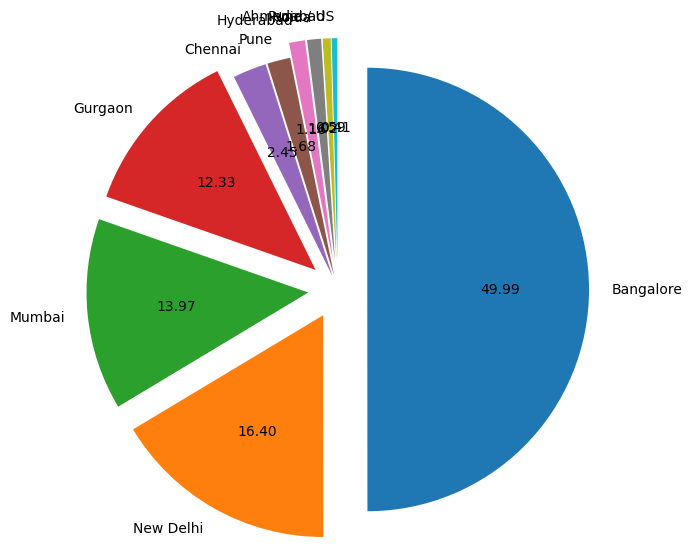

Bangalore 49.99
New Delhi 16.40
Mumbai 13.97
Gurgaon 12.33
Chennai 2.45
Pune 1.68
Hyderabad 1.16
Noida 1.02
Ahmedabad 0.59
Pune / US 0.41


In [89]:
explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.xticks(rotation=90)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))  

Problem Statement :
There are 4 different type of investments. Find out
percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount
funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity",
"Seed Funding", "Debt Funding", and "Crowd Funding".
Keep an eye for any spelling mistake. You can find this by
printing unique values from this column.

Print the investment type in descending order with respect
to the percentage of the amount funded.

In [91]:
df3 = pd.read_csv('startup_funding_.csv',encoding='utf-8')
df3.head(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN


In [92]:
df3['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [119]:
df3['InvestmentType']  = df3['InvestmentType'].replace('PrivateEquity','Private Equity')
df3['InvestmentType']  = df3['InvestmentType'].replace('SeedFunding','Seed Funding')
df3['InvestmentType']  = df3['InvestmentType'].replace('Crowd funding','Crowd Funding')

# print(df3['InvestmentType'].unique())


df3['AmountInUSD'] = df3['AmountInUSD'].replace(",","",regex=True)
df3['AmountInUSD'] = df3['AmountInUSD'].replace(np.nan,0)
df3['AmountInUSD'] = df3['AmountInUSD'].astype(float)

print(df2['AmountInUSD'])

0       1300000.0
1             0.0
2             0.0
3        500000.0
4        850000.0
          ...    
2367    4500000.0
2368     825000.0
2369    1500000.0
2370          0.0
2371     140000.0
Name: AmountInUSD, Length: 2372, dtype: float64


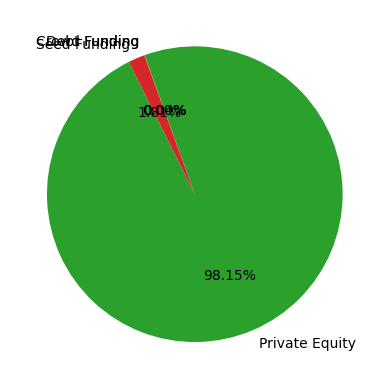

Crowd Funding 155768.0
Debt Funding 7800000.0
Private Equity 18007085000.0
Seed Funding 332345708.0


In [131]:
ans1 = df3.groupby('InvestmentType')['AmountInUSD'].sum()
# ans1 = ans1.sort_values(ascending = False)[:10]
FundType = ans1.index
FundValue = ans1.values

plt.pie(FundValue,labels=FundType,autopct="%.2f%%",startangle=110,counterclock=False)
plt.show()

for i in range(0,len(FundType)):
    print(FundType[i],FundValue[i])

Problem Statement :
Which type of companies got more easily funding. To
answer this question, find -

Top 5 industries and percentage of the total amount
funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount
funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct
it.

Print the industry in descending order with respect to the
percentage of the amount funded.

In [3]:
data = pd.read_csv('startup_funding_.csv',encoding='utf-8')
data.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN


In [17]:
data['AmountInUSD'] = data['AmountInUSD'].replace(',','',regex=True)
data['AmountInUSD'] = data['AmountInUSD'].fillna(0)
data['AmountInUSD'] = data['AmountInUSD'].astype(float).astype(int)

data['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
data['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
data['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)

check = data.groupby('IndustryVertical')['AmountInUSD'].sum()
check = check.sort_values(ascending=False)[:5]

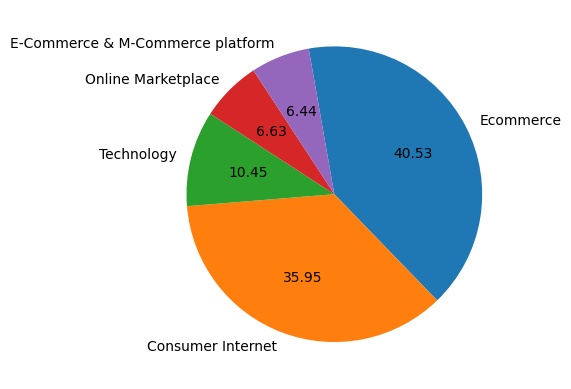

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [18]:
industry = check.index
amount = check.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

Problem Statement :
Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to
amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct
their names. There are many errors in startup names,
ignore correcting all, just handle important ones.

In [45]:
df = pd.read_csv('startup_funding_.csv',encoding = 'utf-8')

In [46]:
df['StartupName'].unique()

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Graphene',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [47]:
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)

df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)

df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)

df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)



df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()

In [48]:
df

StartupName
#Fame                   10000000.0
121Policy                      0.0
1Crowd                         0.0
1mg                     30000000.0
1mg (Healthkartplus)     6000000.0
                           ...    
underDOGS                      0.0
vImmune                        0.0
vPhrase Analytics              0.0
wWhere                    200000.0
wayForward               1000000.0
Name: AmountInUSD, Length: 1994, dtype: float64

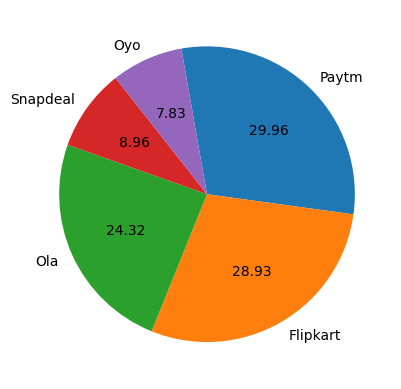

Paytm 29.96
Flipkart 28.93
Ola 24.32
Snapdeal 8.96
Oyo 7.83


In [49]:
df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))
    

#### PROBLEM STATEMENT
Find the top 5 startups who received the most number of
funding rounds. That means, startups which got fundings
maximum number of times.

Print the startup name in descending order with respect to
the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct
their names. There are many errors in startup names,
ignore correcting all, just handle important ones.

In [59]:
ndf = pd.read_csv('startup_funding_.csv',encoding='utf-8')
ndf.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN


In [60]:
# Correction of the data
ndf['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)

ndf['StartupName'].replace('Ola Cabs','Ola',inplace = True)
ndf['StartupName'].replace('Olacabs','Ola',inplace = True)
ndf['StartupName'].replace('Ola Cabs','Ola',inplace = True)

ndf['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
ndf['StartupName'].replace('Oyorooms','Oyo',inplace = True)
ndf['StartupName'].replace('OyoRooms','Oyo',inplace = True)

ndf['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

ndf['AmountInUSD'] = ndf['AmountInUSD'].replace(',','',regex=True)
ndf['AmountInUSD'] = ndf['AmountInUSD'].fillna(0)
ndf['AmountInUSD'] = ndf['AmountInUSD'].astype(float).astype(int)

In [74]:
# .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
# faster way to change all the data values.
for i in range(len(ndf['StartupName'])):
    if 'Paytm' in ndf['StartupName'].iloc[i]:
        ndf['StartupName'].replace(ndf['StartupName'].iloc[i],'Paytm',inplace=True)
    elif 'Flipkart' in ndf['StartupName'].iloc[i]:
        ndf['StartupName'].replace(ndf['StartupName'].iloc[i],'Flipkart',inplace=True)
    elif 'Ola' in ndf['StartupName'].iloc[i]:
        ndf['StartupName'].replace(ndf['StartupName'].iloc[i],'Ola',inplace=True)
    elif 'Oyo' in ndf['StartupName'].iloc[i]:
        ndf['StartupName'].replace(ndf['StartupName'].iloc[i],'Oyo',inplace=True)

In [75]:
ndf.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN


In [76]:
ans3 = ndf['StartupName'].value_counts()
ans3[:5]

StartupName
Ola          9
Swiggy       7
Paytm        6
UrbanClap    6
NoBroker     5
Name: count, dtype: int64

In [79]:
ans2 = ndf.groupby('StartupName')['AmountInUSD'].count()
ans2.sort_values(ascending=False)[:5]

StartupName
Ola          9
Swiggy       7
Paytm        6
UrbanClap    6
Flipkart     5
Name: AmountInUSD, dtype: int64